In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
df = pd.read_csv('./ball_drop_data.csv')
df.head()

,drop_height,bounce_height
0,100,83.0
1,100,86.0
2,100,85.0
3,200,159.0
4,200,161.5


In [3]:
avg_drop = []
avg_bounce = []
# get the average of the three trials
for i in range(0, 18, 3):
    avg_bounce.append(df['bounce_height'][i:i + 3].mean())
    avg_drop.append(df['drop_height'][i])
    
# turn into numpy arrays
avg_bounce = np.array(avg_bounce)
avg_drop = np.array(avg_drop)

# combine and create a dataframe
data = np.hstack((avg_drop.reshape(-1, 1), avg_bounce.reshape(-1, 1)))
averages = pd.DataFrame(data, columns=df.columns)
averages

,drop_height,bounce_height
0,100.0,84.666667
1,200.0,160.500000
2,150.0,123.000000
3,175.0,142.666667
4,125.0,103.666667
5,75.0,61.666667


In [4]:
# the mathematical model
def model(x):
    return 0.7857142857 * x + 4.658730159 

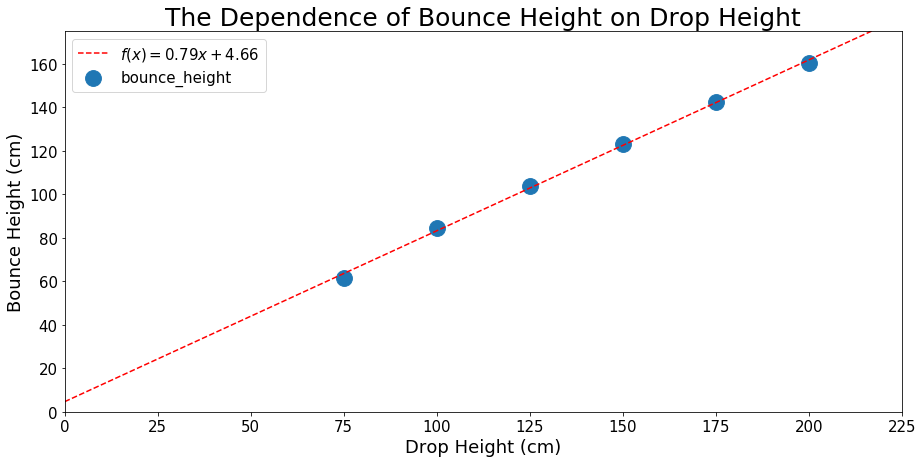

In [5]:
X = averages['drop_height']
y = averages['bounce_height']
line_x = np.array([0, 225])
line_y = np.apply_along_axis(model, 0, line_x)

plt.figure(figsize=(15, 7))
plt.scatter(X, y, s=250)
line = plt.plot(line_x, line_y, '--', c='r', label=r'$f(x) = 0.79x + 4.66$')

plt.xlim(0, 225)
plt.ylim(0, 175)

plt.xticks(size=15)
plt.yticks(size=15)

plt.title('The Dependence of Bounce Height on Drop Height', size=25)
plt.xlabel('Drop Height (cm)', size=18)
plt.ylabel('Bounce Height (cm)', size=18)

#plt.legend((line), ('0.79 * x + 4.66'))
plt.legend(prop={'size': 15})

plt.show()